# Keck HIRES multi-epoch

Multiple visits to the same object

In [1]:
import pandas as pd
import numpy as np
import glob
import astropy
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from tqdm.notebook import tqdm

#import warnings
#warnings.simplefilter("ignore")

In [2]:
from muler.hires import KeckHIRESSpectrum, KeckHIRESSpectrumList

In [3]:
search_pattern = '../../muler_example_data/Keck_HIRES/02_multi_epoch/**/extracted/binaryfits/ccd*/flux/HI.*_flux.fits.gz'

In [4]:
fns = sorted(glob.glob(search_pattern, recursive=True))

In [5]:
len(fns)

774

In [6]:
import os

In [7]:
basenames = [os.path.basename(fn) for fn in fns]

In [8]:
df = pd.DataFrame(data={'basename':basenames, 'full_path':fns})

In [9]:
df['median_wl'] = np.NaN
df['min_wl'] = np.NaN
df['max_wl'] = np.NaN
df['ccd'] = np.NaN #CCDLOC
df['decker'] = '' # DECKNAME
df['iodine'] = False # IODIN
df['MJD'] = False # IODIN

In [10]:
spec = KeckHIRESSpectrum(file=fns[0])

In [11]:
for i, fn in enumerate(tqdm(df.full_path.values, total=len(df)) ):
    spec = KeckHIRESSpectrum(file=fn)
    df.loc[i, 'median_wl'] = np.nanmedian(spec.wavelength.value)
    df.loc[i, 'min_wl'] = np.nanmin(spec.wavelength.value)
    df.loc[i, 'max_wl'] = np.nanmax(spec.wavelength.value)
    df.loc[i, 'ccd'] = int(spec.meta['header']['CCDLOC'])
    df.loc[i, 'decker'] = spec.meta['header']['DECKNAME']
    df.loc[i, 'MJD'] = spec.meta['header']['MJD']
    df.loc[i, 'iodine'] = spec.meta['header']['IODIN']

  0%|          | 0/774 [00:00<?, ?it/s]

In [12]:
df.decker.value_counts()

C2    430
B5    344
Name: decker, dtype: int64

Only two decker settings:

|Decker| H(") | W(")| R|
|-- | -- | -- | -- |
B5 |	3.5 |	0.861 |	48,000 | 
C2 | 14.0 |	0.861 |	48,000 | 

In [13]:
df = df.sort_values('median_wl').reset_index(drop=True)

In [14]:
feature_wl = 3934 #H-alpha

In [15]:
mask = (df.min_wl < feature_wl) & (df.max_wl > feature_wl) 

In [16]:
df = df[mask].reset_index(drop=True)

In [17]:
len(df)

39

In [18]:
df.iodine.value_counts()

True     35
False     4
Name: iodine, dtype: int64

In [22]:
df['corrupt'] = False

for i, fn in enumerate(tqdm(df.full_path.values, total=len(df)) ):
    spec_raw = KeckHIRESSpectrum(file=fn)
    spec = spec_raw.normalize()
    if np.std(spec.flux.value) > 0.35:
        df.loc[i, 'corrupt'] = True

  0%|          | 0/39 [00:00<?, ?it/s]

In [23]:
df[['basename', 'MJD', 'iodine', 'corrupt']]

,basename,MJD,iodine,corrupt
0,HI.20110516.28232_1_07_flux.fits.gz,55697.326782,True,False
1,HI.20110517.36541_1_05_flux.fits.gz,55698.422956,True,False
2,HI.20120118.56474_1_12_flux.fits.gz,55944.653654,True,False
3,HI.20110515.28547_1_05_flux.fits.gz,55696.330429,True,False
4,HI.20110518.28109_1_05_flux.fits.gz,55699.325363,True,False
5,HI.20111019.18223_1_12_flux.fits.gz,55853.210939,True,False
6,HI.20100224.47177_1_07_flux.fits.gz,55251.546057,False,False
7,HI.20110523.29143_1_07_flux.fits.gz,55704.337319,True,False
8,HI.20110519.32471_1_05_flux.fits.gz,55700.375847,True,False
9,HI.20110524.30567_1_07_flux.fits.gz,55705.353804,True,False


  0%|          | 0/39 [00:00<?, ?it/s]

0 0.3115767682890187 2429.844750045231 m / s
1 0.3150305573700444 2078.564491754859 m / s
2 0.34170020317093147 9630.955117578324 m / s
3 0.3282194118475394 2620.0739607432392 m / s
4 0.3248624753556502 2042.149298440195 m / s
5 0.32177526752401797 -7542.50614498041 m / s
6 0.3131663896706241 12011.788770460313 m / s
7 0.3229744781337731 1048.3363365907976 m / s
8 0.31421604474557197 1774.1643579178863 m / s
9 0.3158066129611855 823.0496477731965 m / s
10 0.3377264168405554 -10583.015398283025 m / s
11 0.3834882945397469 -9584.767868863453 m / s
12 74492417382.1937 -9578.833025373335 m / s
13 0.37739812347938906 -10321.336851716442 m / s
14 0.31185126849669403 -10538.971349891814 m / s
15 0.35466889811039837 -7180.56785180818 m / s
16 0.4276818397583006 2555.305071660573 m / s
17 0.3133463543557782 657.8242036719339 m / s
18 0.30289398369199355 438.243707697539 m / s
19 0.35751810423471975 2429.844750045231 m / s
20 0.32104040203659395 2078.564491754859 m / s
21 0.3991042277694847 9630

(-0.1, 3.2)

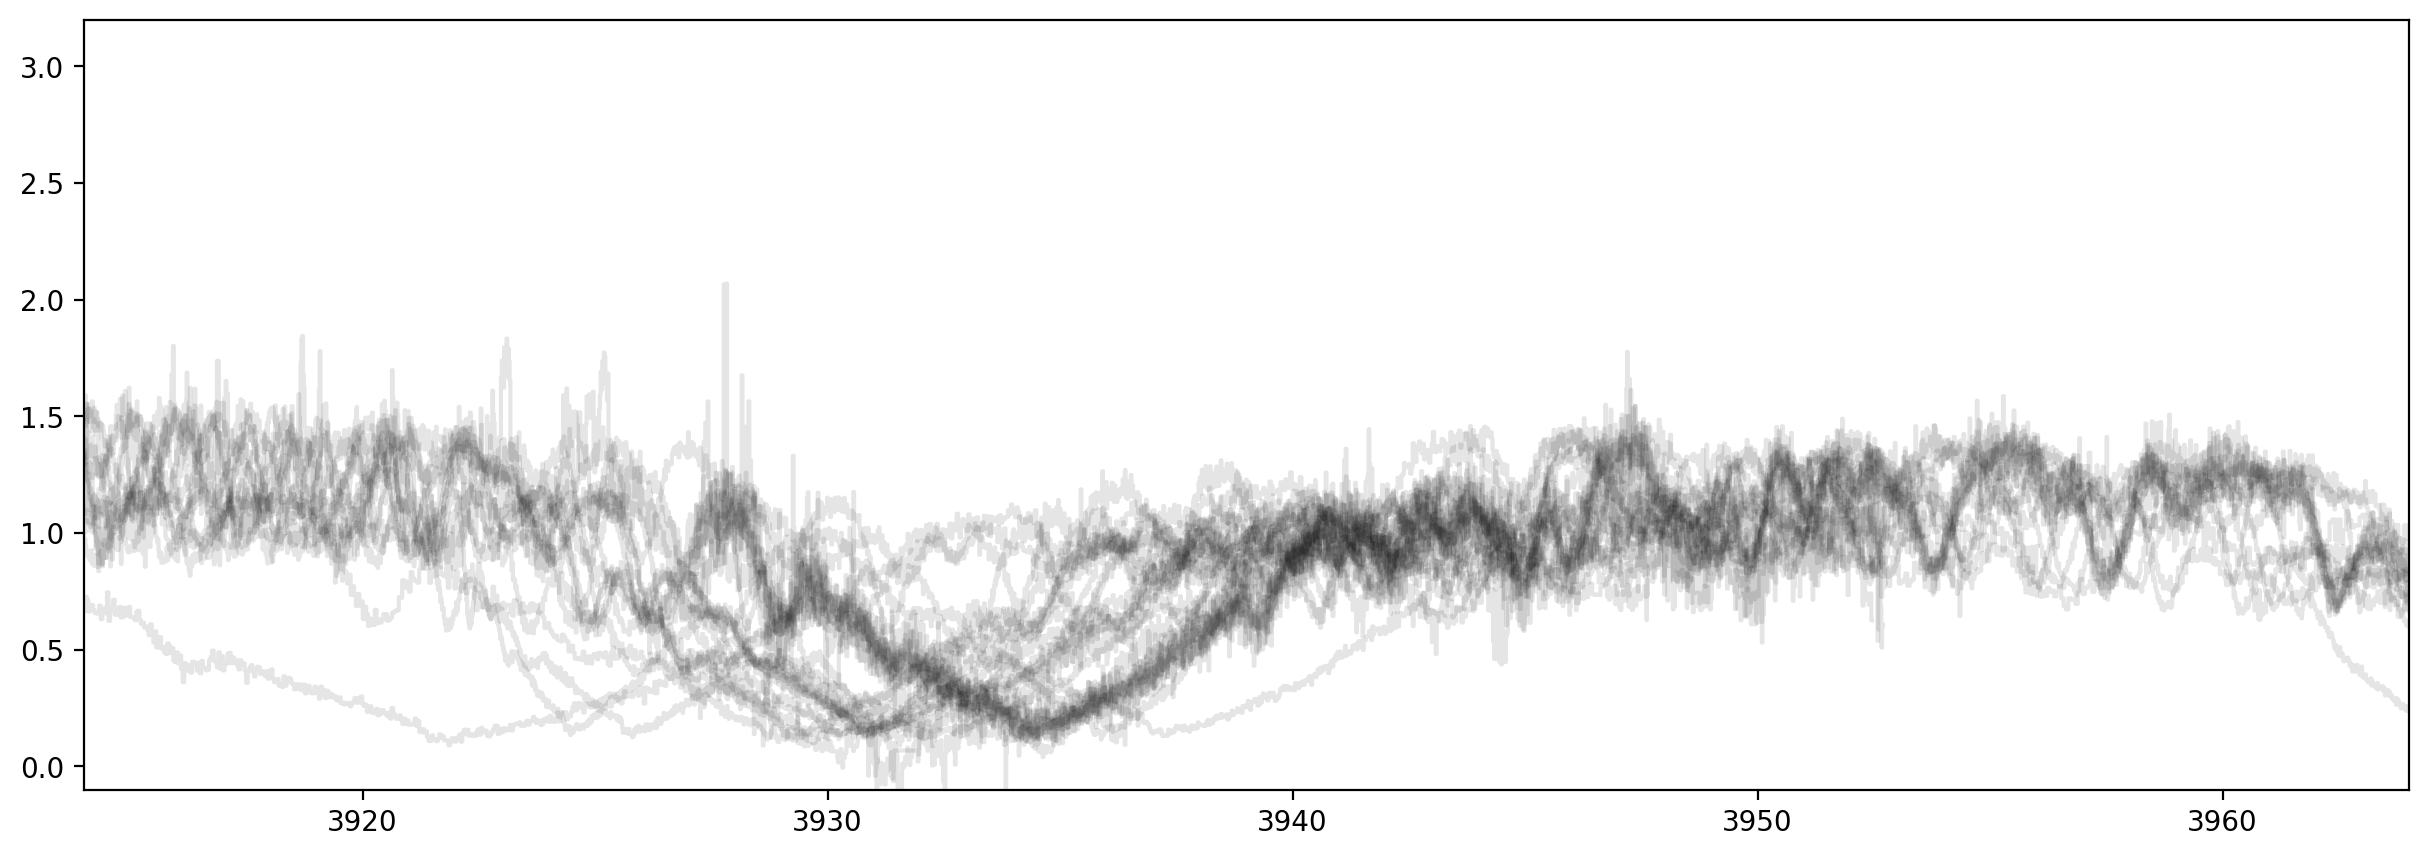

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
for i, fn in enumerate(tqdm(df.full_path.values, total=len(df)) ):
    spec_raw = KeckHIRESSpectrum(file=fn)
    spec_cln = spec_raw.subtract(spec_raw.sky, handle_meta='ff')
    
    spec = spec_raw.normalize().barycentric_correct()
    print(i, np.std(spec.flux.value), spec.estimate_barycorr())
    if ~df.loc[i, 'corrupt']:
        spec.plot(ax=ax, color='k', alpha=0.1)
    
ax.set_xlim(feature_wl-20, feature_wl+30)
ax.set_ylim(-0.1, 3.2)

Hmmm, it looks like the sources have different continuum levels.  We need to normalize to a common wavelength index.